We'll get data from the [census api](https://www.census.gov/developers/)

Request a [census api key](https://api.census.gov/data/key_signup.html)

To make querying easier, we'll install [census library](https://pypi.python.org/pypi/census)
```
pip install census
```

[census wrapper documentation](https://github.com/CommerceDataService/census-wrapper)

We're getting data from [American Community Survey 5-Year Data (2009-2016)](https://www.census.gov/data/developers/data-sets/acs-5year.html)


Here is a [list of labels to query](https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b)
See the variable key in each dictionary.

For example: to get `income`, query `B19013_001E`
```
var census_aliases = {  
  //Economic Variables 
    "income":{  
    "api":"acs",
    "variable":"B19013_001E",
    "description":"Median household income in the past 12 months (in 2013 inflation-adjusted dollars)",
    "text":"median household income",
    "unit":"dollars"
  },
```

Here's where we get [ACS Data Profiles Variables such as zip code tabulation area](https://api.census.gov/data/2016/acs/acs5/profile/variables.html)

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import seaborn as sns
%matplotlib inline
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Census API Key
from localenv import census_api_key

plotly.tools.set_credentials_file(username='npejoro', api_key='ArkEQImxVd17HEcfXrJ4')

In [2]:
# Load census daya 2011 - 2015

c11 = Census(census_api_key, year=2011)
c12 = Census(census_api_key, year=2012)
c13 = Census(census_api_key, year=2013)
c14 = Census(census_api_key, year=2014)
c15 = Census(census_api_key, year=2015)

In [3]:
census_data11 = c11.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data12 = c12.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E",
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data13 = c13.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data14 = c14.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

census_data15 = c15.acs5.get(("NAME", 
                          "B19013_001E", 
                          "B01003_001E", 
                          "B01002_001E",
                          "B23025_005E", 
                          "B25058_001E", 
                          "B25077_001E"), {'for': 'state:*'})

In [4]:
# Convert to DataFrame
census_pd11 = pd.DataFrame(census_data11)

# Column Reordering
census_pd11 = census_pd11.rename(columns={"B01003_001E": "Population (2011)",
                                      "B01002_001E": "Median Age (2011)",
                                      "B19013_001E": "Household Income (2011)",
                                      "B23025_005E": "Unemployment Count (2011)",
                                      "B25058_001E": "Median Rent (2011)",
                                      "B25077_001E": "Median Home Value (2011)",
                                      "NAME": "Name", 
                                      "state": "State"})

# Add in Employment Rate (Employment Count / Population)
census_pd11["Unemployment Rate (2011)"] = 100 * \
    census_pd11["Unemployment Count (2011)"].astype(
        int) / census_pd11["Population (2011)"].astype(int)

# Final DataFrame
census_pd11 = census_pd11[["State", "Name", "Population (2011)", "Median Age (2011)", "Household Income (2011)", 
                           "Unemployment Rate (2011)", "Median Rent (2011)", "Median Home Value (2011)"]]

census_pd11.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800
1,02,Alaska,700703,33.8,69014,4.414424,913,235100
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100
4,06,California,36969200,35.1,61632,5.055211,1083,421600


In [5]:
# Convert to DataFrame
census_pd12 = pd.DataFrame(census_data12)

# Column Reordering
census_pd12 = census_pd12.rename(columns={"B01003_001E": "Population (2012)",
                                      "B01002_001E": "Median Age (2012)",
                                      "B19013_001E": "Household Income (2012)",
                                      "B23025_005E": "Unemployment Count (2012)",
                                      "B25058_001E": "Median Rent (2012)",
                                      "B25077_001E": "Median Home Value (2012)", 
                                      "NAME": "Name (2012)", 
                                      "state": "State (2012)"})

# Add in Employment Rate (Employment Count / Population)
census_pd12["Unemployment Rate (2012)"] = 100 * \
    census_pd12["Unemployment Count (2012)"].astype(
        int) / census_pd12["Population (2012)"].astype(int)

# Final DataFrame
census_pd12 = census_pd12[["Name (2012)", "State (2012)", "Population (2012)", "Median Age (2012)", "Household Income (2012)", "Unemployment Rate (2012)", "Median Rent (2012)", "Median Home Value (2012)"]]

census_pd12.head()

,Name (2012),State (2012),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,Alabama,01,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,Alaska,02,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,Arizona,04,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,Arkansas,05,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,California,06,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [6]:
# Convert to DataFrame
census_pd13 = pd.DataFrame(census_data13)

# Column Reordering
census_pd13 = census_pd13.rename(columns={"B01003_001E": "Population (2013)",
                                      "B01002_001E": "Median Age (2013)",
                                      "B19013_001E": "Household Income (2013)",
                                      "B23025_005E": "Unemployment Count (2013)",
                                      "B25058_001E": "Median Rent (2013)",
                                      "B25077_001E": "Median Home Value (2013)", 
                                      "NAME": "Name (2013)", 
                                      "state": "State (2013)"})

# Add in Employment Rate (Employment Count / Population)
census_pd13["Unemployment Rate (2013)"] = 100 * \
    census_pd13["Unemployment Count (2013)"].astype(
        int) / census_pd13["Population (2013)"].astype(int)

# Final DataFrame
census_pd13 = census_pd13[["Name (2013)", "State (2013)", "Population (2013)", "Median Age (2013)", "Household Income (2013)", "Unemployment Rate (2013)", "Median Rent (2013)", "Median Home Value (2013)"]]

census_pd13.head()

,Name (2013),State (2013),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,Alabama,01,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,Alaska,02,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,Arizona,04,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,Arkansas,05,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,California,06,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0


In [7]:
# Convert to DataFrame
census_pd14 = pd.DataFrame(census_data14)

# Column Reordering
census_pd14 = census_pd14.rename(columns={"B01003_001E": "Population (2014)",
                                      "B01002_001E": "Median Age (2014)",
                                      "B19013_001E": "Household Income (2014)",
                                      "B23025_005E": "Unemployment Count (2014)",
                                      "B25058_001E": "Median Rent (2014)",
                                      "B25077_001E": "Median Home Value (2014)", 
                                      "NAME": "Name (2014)", 
                                      "state": "State (2014)"})

# Add in Employment Rate (Employment Count / Population)
census_pd14["Unemployment Rate (2014)"] = 100 * \
    census_pd14["Unemployment Count (2014)"].astype(
        int) / census_pd14["Population (2014)"].astype(int)

# Final DataFrame
census_pd14 = census_pd14[["Name (2014)", "State (2014)", "Population (2014)", "Median Age (2014)", "Household Income (2014)", "Unemployment Rate (2014)", "Median Rent (2014)", "Median Home Value (2014)"]]

census_pd14.head()

,Name (2014),State (2014),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,Alabama,01,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,Alaska,02,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,Arizona,04,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,Arkansas,05,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,California,06,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [8]:
# Convert to DataFrame
census_pd15 = pd.DataFrame(census_data15)

# Column Reordering
census_pd15 = census_pd15.rename(columns={"B01003_001E": "Population (2015)",
                                      "B01002_001E": "Median Age (2015)",
                                      "B19013_001E": "Household Income (2015)",
                                      "B23025_005E": "Unemployment Count (2015)",
                                      "B25058_001E": "Median Rent (2015)", 
                                      "B25077_001E": "Median Home Value (2015)", 
                                      "NAME": "Name (2015)", 
                                      "state": "State (2015)"})

# Add in Employment Rate (Employment Count / Population)
census_pd15["Unemployment Rate (2015)"] = 100 * \
    census_pd15["Unemployment Count (2015)"].astype(
        int) / census_pd15["Population (2015)"].astype(int)

# Final DataFrame
census_pd15 = census_pd15[["Name (2015)", "State (2015)", "Population (2015)", "Median Age (2015)", "Household Income (2015)", "Unemployment Rate (2015)", "Median Rent (2015)", "Median Home Value (2015)"]]

census_pd15.head()

,Name (2015),State (2015),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alaska,02,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alabama,01,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arkansas,05,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arizona,04,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,06,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [9]:
#merging 2011-2012
census_merge1112 = pd.merge(census_pd11, census_pd12, left_index=True, right_index=True, how='outer')

In [10]:
census_merge1112.rename(index=str, columns={"Name":"State"})
dropColumns = ["State (2012)", "Name (2012)"]

census_merge1112.drop(dropColumns, inplace=True, axis=1)

In [11]:
census_merge1112.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0


In [12]:
#merging 2011-2013
census_merge111213 = pd.merge(census_merge1112, census_pd13, left_index=True, right_index=True, how='outer')

In [13]:
dropColumns = ["State (2013)", "Name (2013)"]

census_merge111213.drop(dropColumns, inplace=True, axis=1)

In [14]:
census_merge111213.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),Median Rent (2012),Median Home Value (2012),Population (2013),Median Age (2013),Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,488.0,122300.0,4799277.0,38.1,43253.0,5.040968,501.0,122500.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,950.0,237900.0,720316.0,33.6,70760.0,4.572854,978.0,241800.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,742.0,175900.0,6479703.0,36.3,49774.0,4.882323,747.0,165100.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,468.0,106300.0,2933369.0,37.5,40768.0,4.132961,480.0,107300.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,1110.0,383900.0,37659181.0,35.4,61094.0,5.758662,1119.0,366400.0


In [15]:
#merging 2011-2014
census_merge11121314 = pd.merge(census_merge111213, census_pd14, left_index=True, right_index=True, how='outer')

In [16]:
dropColumns = ["State (2014)", "Name (2014)"]

census_merge11121314.drop(dropColumns, inplace=True, axis=1)

In [17]:
census_merge11121314.head()

,State,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),...,Household Income (2013),Unemployment Rate (2013),Median Rent (2013),Median Home Value (2013),Population (2014),Median Age (2014),Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014)
0,01,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,...,43253.0,5.040968,501.0,122500.0,4817678.0,38.2,43511.0,4.747432,511.0,123800.0
1,02,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,...,70760.0,4.572854,978.0,241800.0,728300.0,33.4,71829.0,4.407112,1012.0,246300.0
2,04,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,...,49774.0,4.882323,747.0,165100.0,6561516.0,36.5,49928.0,4.634097,753.0,162900.0
3,05,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,...,40768.0,4.132961,480.0,107300.0,2947036.0,37.6,41264.0,3.905280,492.0,108700.0
4,06,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,...,61094.0,5.758662,1119.0,366400.0,38066920.0,35.6,61489.0,5.476051,1138.0,371400.0


In [18]:
#final merge years 2011-2015
census_2011_2015 = pd.merge(census_merge11121314, census_pd15, left_index=True, right_index=True, how='outer')

In [19]:
dropColumns = ["State", "State (2015)", "Name (2015)"]

census_2011_2015.drop(dropColumns, inplace=True, axis=1)

census_2011_2015.head()

,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
0,Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
1,Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
2,Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
3,Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
4,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [20]:
census_2011_2015.to_csv("Census_2011_2015.csv", encoding="utf-8",index=False)

In [21]:
#census_2011_2015.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51])

In [22]:
census_2011_2015_50States = census_2011_2015.set_index("Name")
census_2011_2015_50States.head()

,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),Unemployment Rate (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
Name,,,,,,,,,,,,,,,,,,,,,
Alabama,4747424,37.7,42934,4.540210,469,120800,4777326.0,37.8,43160.0,4.830694,...,43511.0,4.747432,511.0,123800.0,733375.0,33.4,72515.0,4.265894,1030.0,250000.0
Alaska,700703,33.8,69014,4.414424,913,235100,711139.0,33.8,69917.0,4.411093,...,71829.0,4.407112,1012.0,246300.0,4830620.0,38.4,43623.0,4.287172,520.0,125500.0
Arizona,6337373,35.7,50752,4.234610,742,197400,6410979.0,36.0,50256.0,4.619139,...,49928.0,4.634097,753.0,162900.0,2958208.0,37.7,41371.0,3.547519,498.0,111400.0
Arkansas,2895928,37.3,40149,3.940015,455,105100,2916372.0,37.4,40531.0,4.023972,...,41264.0,3.905280,492.0,108700.0,6641928.0,36.8,50255.0,4.151084,760.0,167500.0
California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,5.517589,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0


In [23]:
#census_2011_2015.to_csv("Census_2011_2015.csv", encoding="utf-8",index=False)

In [25]:
#Ray's code



census_2011_2015_50States["Population (2015)"] = pd.to_numeric(census_2011_2015_50States["Population (2015)"])
census_2011_2015_50States["Median Age (2015)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2015)"])
census_2011_2015_50States["Population (2014)"] = pd.to_numeric(census_2011_2015_50States["Population (2014)"])
census_2011_2015_50States["Median Age (2014)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2014)"])
census_2011_2015_50States["Population (2013)"] = pd.to_numeric(census_2011_2015_50States["Population (2013)"])
census_2011_2015_50States["Median Age (2013)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2013)"])
census_2011_2015_50States["Population (2012)"] = pd.to_numeric(census_2011_2015_50States["Population (2012)"])
census_2011_2015_50States["Median Age (2012)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2012)"])
census_2011_2015_50States["Population (2011)"] = pd.to_numeric(census_2011_2015_50States["Population (2011)"])
census_2011_2015_50States["Median Age (2011)"] = pd.to_numeric(census_2011_2015_50States["Median Age (2011)"])
#census_2011_2015["State"] = pd.to_numeric(census_2011_2015["State"])

In [26]:
#Ray's code

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 33
plt.rcParams["figure.figsize"] = fig_size

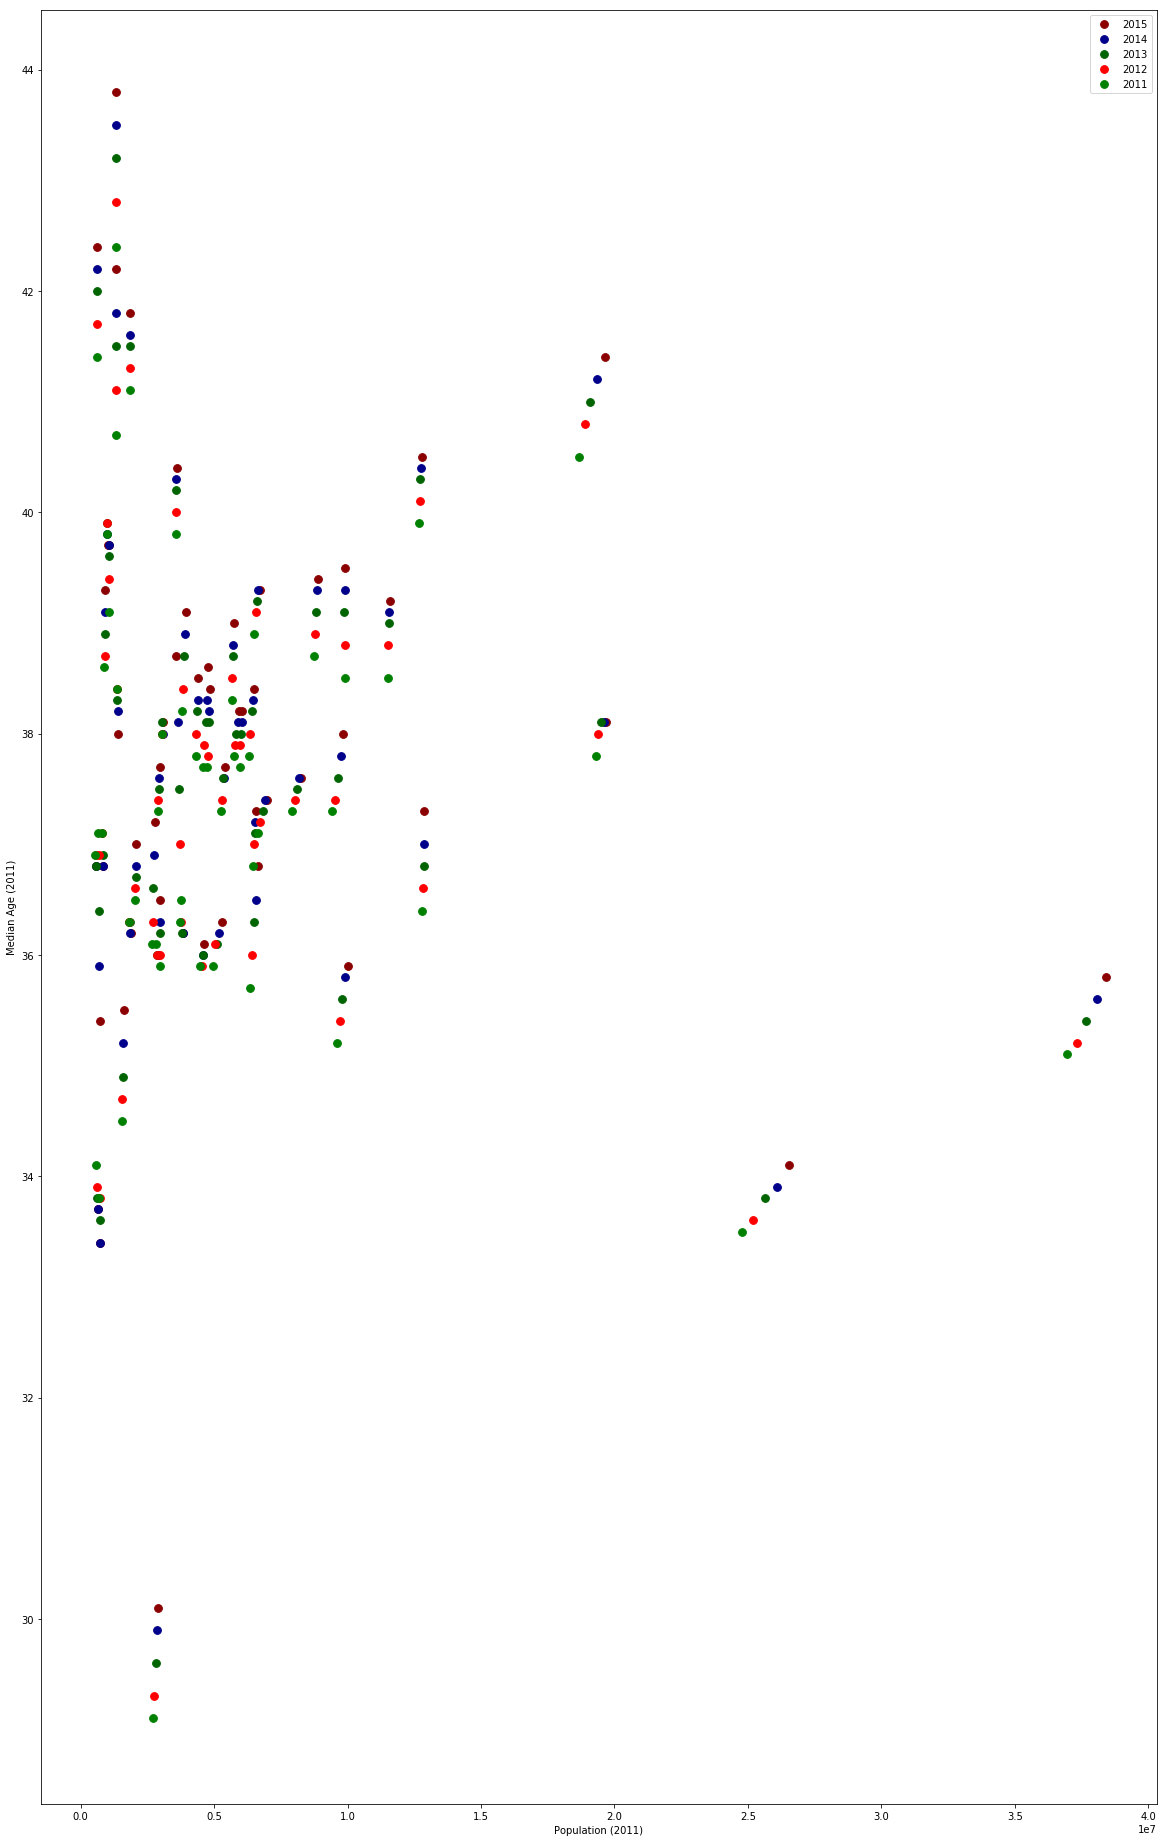

In [30]:
ax = census_2011_2015_50States.plot.scatter(x='Population (2015)', y='Median Age (2015)', label='2015', color = 'DarkRed', s=60)
census_2011_2015_50States.plot.scatter(x='Population (2014)', y='Median Age (2014)', label='2014', color='DarkBlue', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2013)', y='Median Age (2013)', label='2013', color='DarkGreen', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2012)', y='Median Age (2012)', label='2012', color='Red', s=60, ax=ax)
census_2011_2015_50States.plot.scatter(x='Population (2011)', y='Median Age (2011)', label='2011', color='Green', s=60, ax=ax)

plt.savefig("PopulationVersusAge.png")
plt.show()


In [31]:
census_2011_2015.drop([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 47, 48, 49, 50, 51])

,Name,Population (2011),Median Age (2011),Household Income (2011),Unemployment Rate (2011),Median Rent (2011),Median Home Value (2011),Population (2012),Median Age (2012),Household Income (2012),...,Household Income (2014),Unemployment Rate (2014),Median Rent (2014),Median Home Value (2014),Population (2015),Median Age (2015),Household Income (2015),Unemployment Rate (2015),Median Rent (2015),Median Home Value (2015)
4,California,36969200,35.1,61632,5.055211,1083,421600,37325068.0,35.2,61400.0,...,61489.0,5.476051,1138.0,371400.0,38421464.0,35.8,61818.0,4.921939,1149.0,385500.0
5,Colorado,4966061,35.9,57685,4.093365,771,236700,5042853.0,36.1,58244.0,...,59448.0,4.218136,848.0,239400.0,5278906.0,36.3,60629.0,3.704896,880.0,247800.0
37,Oregon,3801991,38.2,49850,5.030943,716,252600,3836628.0,38.4,50036.0,...,50521.0,5.287279,766.0,234100.0,3939233.0,39.1,51243.0,4.671366,779.0,237300.0
41,South Dakota,807697,37.1,48010,2.594785,482,127000,815871.0,37.1,49091.0,...,50338.0,2.559458,533.0,135700.0,4777576.0,38.6,45483.0,4.562502,608.0,139900.0
43,Texas,24774187,33.5,50920,3.594217,651,126400,25208897.0,33.6,51563.0,...,52576.0,3.765824,707.0,131400.0,6499615.0,38.4,45219.0,4.097120,591.0,142100.0
